# Lekce 4

## Korelace

V reálném světě se často stává, že nějaká skutečnost má vliv na něco jiného. Například čas strávený studiem má vliv na body. V souboru [Student_Marks.csv](Student_Marks.csv) jsou data o průměrné době, kterou uživatelé strávili studiem on-line kurzu, a průměrným počtem bodů, které z kurzů dostali. Podívejme se, jak silný je vliv doby strávené studiem na bodový výsledek.

In [93]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = pd.read_csv("Student_Marks.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [63]:
data['Marks'].min()

5.609

In [64]:
data['Marks'].max()

55.299

In [65]:
data['time_study'].min()

0.096

In [66]:
data['time_study'].max()

7.957

K zobrazení použijeme bodový graf (*scatter plot*). Na vodorovné ose máme průměrný čas strávený studiem a na svislé ose průměrný počet bodů. Vidíme, že známka má tendenci růst s tím, jak roste čas strávený studiem. Současně je patrný jistý vliv náhody. Takové závislosti se říká stochastická závislost (*stochastic dependence*). Dále platí, že závislost je lineární (*linear*), tj. kdybychom ho chtěly popsat pomocí matematické funkce, mohli bychom použít přímku.

<Axes: xlabel='time_study', ylabel='Marks'>

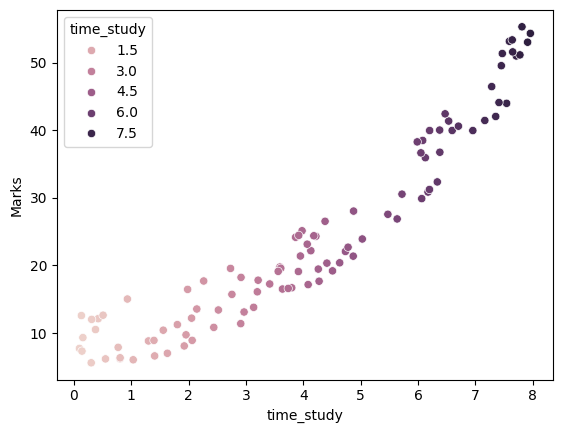

In [67]:
sns.scatterplot(data=data, x="time_study", y="Marks",hue='time_study',color='pink')

Takové závislosti říkáme **korelace** (*correlation*) a to, jak je závislost silná, můžeme popsat pomocí **korelačního koeficientu** (*correlation coefficient*). Pro jeho hodnoty platí následující:

- Hodnoty blízko +1 znamenají silnou přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.


- Hodnoty blízko 0 znamenají lineární nezávislost. Není žádný vztah.
- Hodnoty blízko -1 znamenají silnou nepřímou lineární závislost, tj. jedna hodnota roste a současně druhá klesá.

Příklady přímé závislosti: čas strávený studiem a výsledek v testu, délka tréninku a výsledek v závodě, délka praxe a výše mzdy atd. Příklady nepřímé závislosti: množství vypitého alkoholu a kognitivní schopnosti, zimní teploty a spotřeba energie na vytápění.

Hodnotu korelace zjistíme pomocí metody `corr()` pro zvolenou tabulku.
Korelační matice je tabulka.
Korelace 0,9 je vysoká. Od 0,7 je už celkem vysoká korelace, v sociálních vědách už 0,6. Nemusí být vždy příčinný vztah. Dvě veličiny se hábají ve stejném směru.

<Axes: xlabel='time_study', ylabel='time_study'>

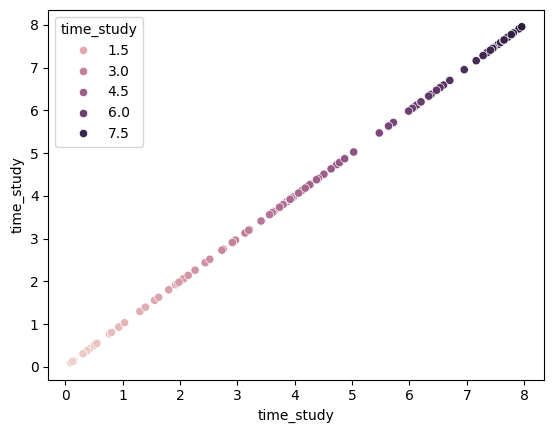

In [68]:
sns.scatterplot(data=data, x="time_study", y="time_study",hue='time_study',color='red')

In [69]:
data.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


Korelace automaticky neznamená, že obě veličiny se vzájemně ovlivňují.

Uvažujme například počet turistů a počet komárů v kempu u přehrady. Obě veličiny jsou sice korelované, ale v důsledku počasí jako třetího vlivu. Pokud bychom například kemp zavřeli a počet turistů by klesl na nulu, počet komárů to nijak neovlivní.

Podobně můžeme "odhalit" korelaci, která je ve skutečnosti náhodná. Doslova legendárním příkladem se stala korelace mezi počtem lidí, kteří se utopili v důsledku pádu do bazénu, a počtem filmů, ve kterých hrál Nicolas Cage. Z logiky věci je jasné, že tyto veličiny se vzájemně nijak neovlivňují, přesto bychom mezi nimi našli vysokou korelaci.


## Regrese

Samotná informace o tom, že existuje statisticky významný vztah mezi obytnou plochou domu a jeho cenou, sice může být zajímavá, ale můžeme zjistit více. K tomu můžeme využít regresi. Regrese je nástroj, který umí vztah mezi dvěma proměnnými popsat. Abychom si pod slovem "popsat" dokázali něco představit, využijeme graf. Využijeme opět modul `seaborn`, tentokrát vygenerujeme graf pomocí funkce `regplot()`. U regrese vždy rozlušujeme mezi **závislou** (**vysvětlovanou**) a **nezávislou** (**vysvětlující**) proměnnou. Závislou proměnnou umísťujeme na svislou osu (*y*) a nezávislou vodorovnou osu (*x*). V našem případě je nezávislou proměnnou čas strávený studiem a závislou počet bodů. Tvrdíme totiž, že čas strávený studiem ovlivňuje počet bodů, tj. počet bodů vysvětlujeme pomocí času stráveného studiem.

Musíme si uvědomit, že výslednou známku ovlivňují i další vlivy - například únava studentů a studentek v době psaní testu, štěstí na otázky atd. Z toho důvodu neleží všechny body na regresní křivce, ale pohybují se kolem ní. Pokud jsou nad ní, pak byl skutečný výsledek studenta nebo studentky lepší, než kolik by predikoval náš model. Pokud je bod pod ní, pak je skutečný výsledek horší.

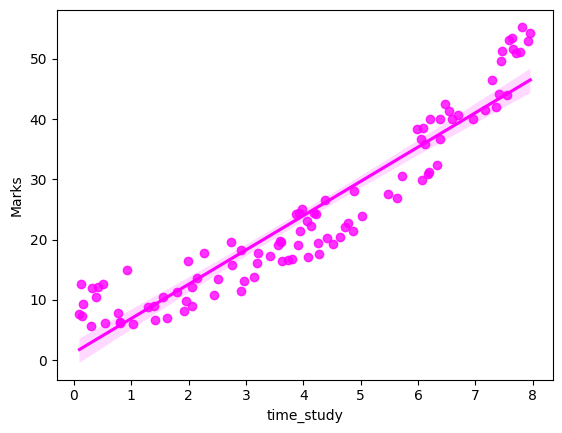

In [94]:
g = sns.regplot(data, x="time_study", y="Marks",color="magenta")

Pomocí této funkce dokážeme predikovat, kolik bodů student nebo studentka kurzu získá, a to na základě počtu hodin, které strávil(a) studiem.

Tato funkce je označovaná jako "lineární" a k jejímu vykreslení potřebujeme znát dvě hodnoty:
přímka   y = ax + b
b- průsečík s osou y 
Při přemapování na druhou mocninu body by se více zploštily.

- První je hodnota, která určuje, kde leží průsečík s osou *y*. V našem případě jde o hodnotu, která udává počet bodů, který by získal(a) potenciální student(ka), který se na test vůbec nepřipravoval(a) (např. kolik otázek je možné si tipnout).
- Druhá je hodnota, která udává sklon funkce. Čím bude hodnota vyšší, tím více skloněná funkce bude. V našem případě toto číslo určí, kolik dodatečných bodů je možné získat hodinou studia navíc.

K zobrazení těchto hodnot můžeme použít modul *statmodels*. Ten zobrazí velkou tabulku se spoustou čísel, nás však budou zajímat pouze některá.

Strávím studiem 1 h více , mám dostat o 5,6 bodu více.
R-squared: - jek moc přímka vysvětluje rozptyl v datech, pozici bodů. Nabývá hodnoty od 0 do 1. Pokud je nula - nevysvětleju vúbec. Nebí souvislost.



In [95]:
data.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


In [96]:
formula = "Marks ~ time_study"# marks - vysvětlovaná a time_study - vysvětlující proměnná
mod = smf.ols(formula=formula, data=data)# funkce ols - nejmenších čtverců, popisuje chybovost na druhou
res = mod.fit()# metoda fit - vypočítá přímku
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     775.8
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.36e-48
Time:                        19:50:30   Log-Likelihood:                -298.21
No. Observations:                 100   AIC:                             600.4
Df Residuals:                      98   BIC:                             605.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2239      0.962      1.272      0.206      -0.686       3.133
time_study     5.6888      0.204     27.853      0.000       5.283       6.094
==============================================================================
Omnibus:                        7.504   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.633
Skew:                           0.357   Prob(JB):                       0.0986
Kurtosis:                       2.225   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podívejme se nejprve na dvě čísla (koeficienty - *coefficients*), která potřebujeme k nakreslení naší funkce:

- V řádku `intercept` máme hodnotu, která určuje, kde funkce protne se svislou osou.
- V řádku `time_study` máme hodnotu, která udává sklon funkce. Hodnota 5.6888 nám říká, že jedna hodina studia navíc přinese v průměru 5.6888 bodů navíc.

Pokud bychom chtěli odhadnout počet bodů na základě hodin strávených studiem, můžeme použít metodu `predict()`. K tomu si načteme data z tabulky `Study_Marks_to_estimate.csv`, kde nám chybí výsledná známka. Tu my odhadneme a odhady vložíme do dat jako nový sloupec.

In [97]:
data_to_predict = pd.read_csv("Study_Marks_to_estimate.csv")
data_to_predict["MarksPredicted"] = res.predict(data_to_predict)
data_to_predict.head()

,number_courses,time_study,MarksPredicted
0,3,5.5,32.511985
1,4,8.0,46.733861
2,1,3.0,18.290109


### Vyhodnocení kvality modelu

Regresní model nevysvětlí data dokonale. Jak jsme si již řekli, na vysvětlovanou proměnnou působí další vlivy, které v datech nemáme. Regresní modely se mezi sebou liší podle toho, jak dobře vysvětlovanou proměnnou dokážou vysvětlit. Abychom tuto skutečnost dokázali vysvětlit, vznikl ukazatel označovaný jako koeficient determinace (*coefficient of determination*, *R-squared*). Ten říká, kolik procent variability (různorodosti) vysvětlované proměnné (v našem případě známky z testu) dokážeme pomocí našeho modelu vysvětlit. Koeficient determinace je číslo mezi 0 a 1 a platí, že čím vyšší koeficient determinace je, tím lépe náš model naše data popisuje.

Model se v matematických vzorcích často značí $R^2$, v naší tabulce je označen jako `R-squared`. Vidíme, že náš model má koeficient determinace 0.88, dokáže tedy vysvětlit přibližně 88 % variability známek z online kurzů.

### Test hypotézy o statistické významnosti koeficientu

S regresí souvisí řada testů statistických hypotéz. Jedním z nich je test statistické významnosti regresního koeficientu. Ten se hodí hlavně v případě, kdy máme koeficientů více a zajímá nás, které má smysl v modelu používat.

Test má následující hypotézy:

- H0: Koeficient je statisticky nevýznamný.
- H1: Koeficient je statisticky významný.

Pokud je p-hodnota testu méně než 0.05, můžeme tedy koeficient označit jako statisticky významný. p-hodnotu testu najdeme ve sloupci `P>|t|`. p-hodnotu máme pro každý koeficient zvlášť. V našem případě platí, že koeficient `time_study` je statisticky významný a koeficient `Intercept` je statisticky nevýznamný.

### Odlehlá pozorování

V případě regrese často můžeme narazit na problémy, které souvisí s daty, které máme k dispozici. Uvažujme například dataset o cenách nemovitostí ze souboru [house_prices.csv](house_prices.csv). V nich máíme data o různých domech, které byly nabízeny k prodeji na americkém trhu.

Na začátku nás budou zajímat dva sloupce:

- `GrLivArea` - obytná plocha domu.
- `SalePrice` - cena domu v dolarech.

In [98]:
data = pd.read_csv("house_prices.csv")
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Vytvoříme si regresní graf. Protože je dat hodně, zmenšíme velikost bodů na 1 s využitím parametru `scatter_kws`.

Na grafu jsou vidět body, které označujeme jako odlehlá pozorování. Jedná se o domy, které jsou výrazně levnější nebo výrazně dražší ve srovnání s podobně velkými domy.
#čÍM JE BOD DÁL, TÍM MÁ VĚTŠÍ PÁKOVÝ VLIV.Jak moc by se přímka, posunula, kdybychom ten bod vynechali. Je doporučeno odstarnit hodnoty s Cookovou vzdáloností větší než 1
světlá 

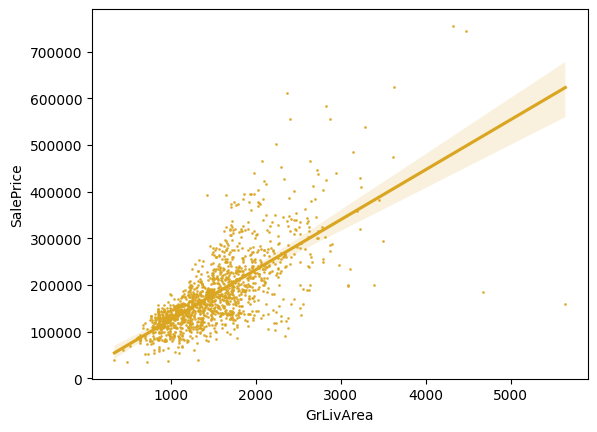

In [99]:
g = sns.regplot(data, x="GrLivArea", y="SalePrice", scatter_kws={"s": 1},color="goldenrod")

Můžeme použít i krabicový graf, abychom se podívali, v jaké cenové relaci se nechází cena domu.

<Axes: xlabel='SalePrice'>

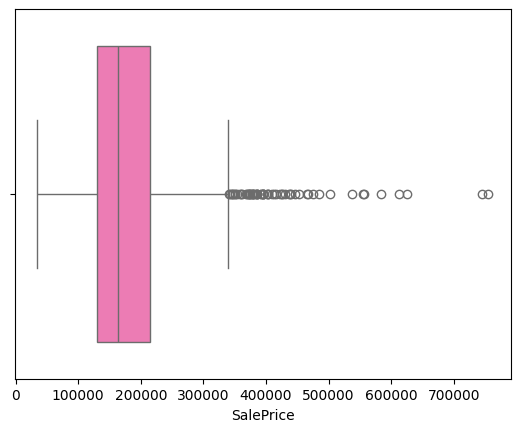

In [100]:
sns.boxplot(data, x="SalePrice",color="hotpink")

Odlehlá pozorování vadí především z důvodu, že mají tendenci "přitahovat" si k sobě regresní funkci. To pak může regresní funkci vychýlit a ona bude zobrazovat chybné výsledky.

Teoreticky je možné, že bychom zdánlivě velmi vysokou nebo nízkou cenu domu dokázali vysvětlit pomocí dalších sloupců - například může být nový, ve vynikajícím stavu, má velký pozemek, je na dobrém místě atd. Pokud ale do dat zařadíme více sloupců, nemůžeme už si data zobrazit graficky.

V rámci regrese existuje měřítko, které říká, jak moc jeden konkrétní bod ovlivňuje regresní funkci. Takovýmu měřítku říkáme Cookova vzdálenost (*Cook's distance*). Cookova vzdálenost jednoho uvažuje, o kolik by se regresní funkce "posunula", pokud bychom tento bod vynechali (anglicky toto ozančujeme jako *leverage*) a vzdálenost bodu od regresní funkce.

In [101]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + YearBuilt + FullBath + HalfBath + GarageArea"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results) # vliv každého bodu na jednotlivé koeficienty
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cook Distance
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1.915350e-05
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3.295641e-05
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7.710510e-07
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.458094e-03
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4.120890e-04


Jednoduché pravidlo (*rule of the thumb*) doporučuje odstranit hodnoty s Cookovou vzdáleností vyšší než 1.

In [102]:
data = data[data['Cook Distance'] < 1]
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     833.0
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:50:48   Log-Likelihood:                -17355.
No. Observations:                1459   AIC:                         3.473e+04
Df Residuals:                    1451   BIC:                         3.477e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.629e+05   9.08e+04     -9.508      0.000   -1.04e+06   -6.85e+05
OverallQual  1.905e+04   1073.847     17.740      0.000    1.69e+04    2.12e+04
GrLivArea      63.3108      3.420     18.513      0.000      56.602      70.019
TotalBsmtSF    37.7036      3.047     12.372      0.000      31.726      43.681
YearBuilt     399.3179     47.693      8.373      0.000     305.764     492.872
FullBath    -9607.9940   2674.084     -3.593      0.000   -1.49e+04   -4362.511
HalfBath    -1784.6415   2422.955     -0.737      0.462   -6537.511    2968.228
GarageArea     43.9541      5.742      7.654      0.000      32.690      55.218
==============================================================================
Omnibus:                      413.680   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14644.507
Skew:                           0.622   Prob(JB):                         0.00
Kurtosis:                      18.471   Cond. No.                     2.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
res.predict(data.head(1))

0    213898.856386
dtype: float64

In [104]:
data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cook Distance
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.000019


### Čtení na doma: Robustní regrese

Regresním modelům vadí i další věc, která se označuje strašidelným pojmem heteroskedasticita (*heteroscedasticity*). Tím je myšleno, že data mají stejnou variabilitu. Vraťme se k regresnímu grafu. Zde vidíme, že čím je dům větší, tím jsou ceny více rozptýlené. Opět platí, že se díváme pouze na dvě proměnné, i když ve výsledném modelu jich máme více.

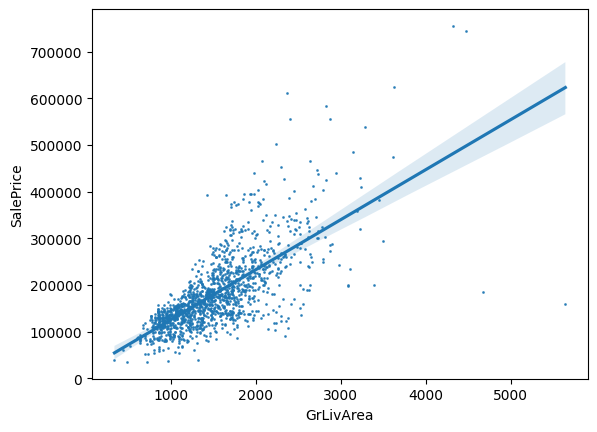

In [105]:
data = pd.read_csv("house_prices.csv")
g = sns.regplot(data, x="GrLivArea", y="SalePrice", scatter_kws={"s": 1})

Pokud máme podezření na heteroskedasticitu, můžeme použít jiný typ regrese, která je označovaná jako robustní regrese. Ta přiřazuje jednotlivým pozorováním různé váhy, čímž vykompenzuje vliv měnící se variability dat. Robustní regrese je alternativním řešením i pro odlehlá pozorování, protože dává menší váhu odlehlejším pozorováním a tím zeslabí jejich vliv na regresní funkci.

In [106]:
formula = "SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + YearBuilt + FullBath + HalfBath + GarageArea"
mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            RLM   Df Residuals:                     1452
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Apr 2024                                         
Time:                        19:51:00                                         
No. Iterations:                     6                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.516e+05   6.52e+04    -13.054      0.000    -9.8e+05   -7.24e+05
OverallQual   1.68e+04    766.452     21.916      0.000    1.53e+04    1.83e+04
GrLivArea      58.1283      2.431     23.913      0.000      53.364      62.893
TotalBsmtSF    31.4140      2.127     14.766      0.000      27.244      35.584
YearBuilt     405.2442     34.289     11.818      0.000     338.039     472.450
FullBath    -7314.6164   1910.839     -3.828      0.000   -1.11e+04   -3569.440
HalfBath    -3183.1509   1742.865     -1.826      0.068   -6599.103     232.801
GarageArea     43.4179      4.130     10.513      0.000      35.323      51.513
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

koeficient -bodový odhad
std err - standartní error - nejistota odhadu
t- ttest
HalfBath nemá vliv na cenu.
[0,025 odhad

Přehled různých metod, jak snížit váhu koeficientů, jsou [zde](https://www.statsmodels.org/dev/examples/notebooks/generated/robust_models_1.html).

### Transformace dat

Podívejme se ještě na další dataset. Ten obsahuje data o střední délce života (*life expectancy*) v různých zemích.

In [107]:
data = pd.read_csv("Life-Expectancy-Data-Updated.csv")
data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Economy_status
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,developing
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,developed
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,developing
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,developing
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,developed


Uvažujme, že nás zajímá, jaký je vliv bohatství země (měřeno pomocí hrubého domácího produktu na hlavu - *GDP per capita*, sloupec `GDP_per_capita`) na střední délku života. Pravděpodobně bude pozitivní, protože lidé v bohatých zemích žijí v průměru déle.

<Axes: xlabel='GDP_per_capita', ylabel='Life_expectancy'>

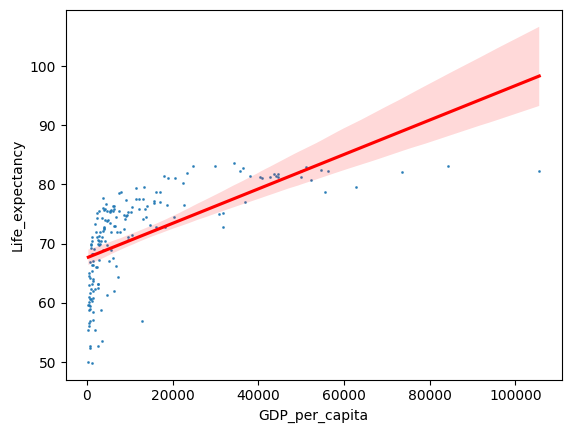

In [108]:
data = data[data["Year"] == 2014]
sns.regplot(data, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})

V grafu vidíme jednu podivnost. Délka života s bohatstvím sice roste, ale naše lineární funkce to nepopisuje moc dobře. Proč?

Zkusme se nad tím zamyslet. V nejchudších zemích je obrovské množství problémů (nedostatek potravin, pitné vody, léků atd.). I malé zvýšení HDP na hlavu povede k velkému nárůstu střední délky života. Pokud země bohatne dál, situace se zlepšuje (např. je dostupná základní zdravotní péče), ale každých tisíc dolarů k HDP na hlavu zvyšuje délku života stále méně. Lineární vztah by naopak předpokládal, že každý tisíc dolarů prodlouží průměrnou délku života o stejný počet let.

Pokud se podíváte na to, jak jsou rozptélené body v obrázku, možná vám to připomene jednu matematickou funkci - logaritmus. Nejprve si zkusme upravit naše zobrazení. U vodorovné osy *x* můžeme přepnout měřítko osy na "logaritmické" (*logarithmic scale*). To způsobí, že hodnoty na vodorovné ose budou "růst stále rychleji".

<Axes: xlabel='GDP_per_capita', ylabel='Life_expectancy'>

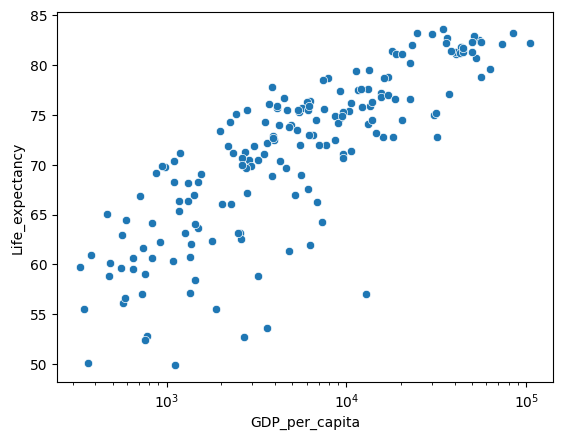

In [109]:
plt.xscale('log')
sns.scatterplot(data, x="GDP_per_capita", y="Life_expectancy")

Tím jsme vyřešili problém zobrazení, ale rádi bychom použili naši myšlenku i v regresním modelu. V takovém případě je možné použít tzv. logaritmickou transformaci (*logarithmic transformation*). Vytvořníme nový sloupec, do kterého uložíme logaritmované hodnoty ze sloupce `GDP_per_capita`.

<Axes: xlabel='log_GDP_per_capita', ylabel='Life_expectancy'>

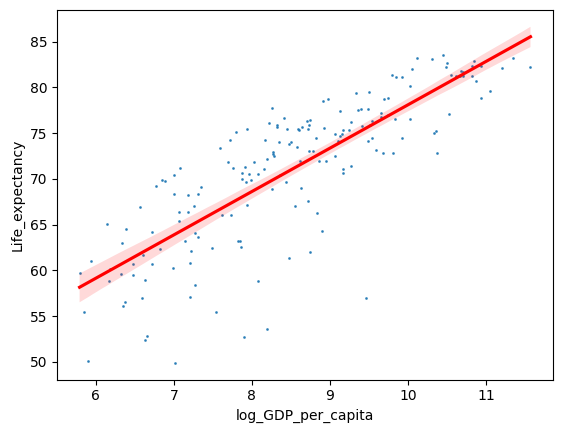

In [110]:
data["log_GDP_per_capita"] = np.log(data["GDP_per_capita"])
sns.regplot(data, x="log_GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})

Regresní funkce již nyní popisuje data celkem dobře. Velký rozdíl oproti předchozímu grafu je nyní na vodorovné ose - namísto HDP na hlavu v dolarech tam vidíme **logaritmus** HDP na hlavu v dolarech.

In [111]:
formula = "Life_expectancy ~ log_GDP_per_capita"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     362.8
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.01e-44
Time:                        19:51:26   Log-Likelihood:                -527.14
No. Observations:                 179   AIC:                             1058.
Df Residuals:                     177   BIC:                             1065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             30.6788      2.156     14.228      0.000      26.424      34.934
log_GDP_per_capita     4.7435      0.249     19.047      0.000       4.252       5.235
==============================================================================
Omnibus:                       42.394   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.513
Skew:                          -1.177   Prob(JB):                     6.60e-17
Kurtosis:                       5.109   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Náš model má index determinace 0.67. Zkusme do něj přidat další sloupce.

In [112]:
formula = "Life_expectancy ~ log_GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     181.9
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           6.22e-67
Time:                        19:51:30   Log-Likelihood:                -462.83
No. Observations:                 179   AIC:                             937.7
Df Residuals:                     173   BIC:                             956.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             29.0217      3.693      7.859      0.000      21.733      36.311
log_GDP_per_capita     2.8762      0.305      9.424      0.000       2.274       3.479
Schooling              0.4516      0.144      3.131      0.002       0.167       0.736
Incidents_HIV         -1.5116      0.143    -10.581      0.000      -1.794      -1.230
Polio                  0.1328      0.021      6.315      0.000       0.091       0.174
BMI                    0.1228      0.144      0.852      0.395      -0.162       0.407
==============================================================================
Omnibus:                        5.821   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.424
Skew:                          -0.400   Prob(JB):                       0.0664
Kurtosis:                       3.294   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

U koeficientů je nyní zajímavé, že jeden z nich je záporný, a to `Incidents_HIV`. Celkem logicky totiž platí, že vyšší výskyt HIV v populaci průměrnou délku života snižuje.

## Čtení na doma

K logaritmické transformaci je třeba dodat, že ji lze použít pouze pro kladné hodnoty. Pokud jsou v datech nuly, je možné použít například funkci `log1p()`.

Další možnou transformací, kterou lze na data použít, je například transformace označovaná jako [Winsorizing](https://en.wikipedia.org/wiki/Winsorizing#:~:text=Winsorizing%20or%20winsorization%20is%20the,as%20clipping%20in%20signal%20processing.). Ta zbaví čísla odlehlých hodnot tak, že je nahradí určitým percentilem.

Jak vlastně regrese funguje? Přidejme si do tabulky `data` dva sloupce:

- `fittedvalues` (vyrovnané hodnoty) jsou hodnoty odhadované modelem, tj. cena domu, kterou by predikoval náš model na základě jeho velikosti,
- `resid` (rezidua) je rozdíl mezi skutečnou cenou domu a predikovanou cenou.

V tabulce níže například vidíme, že v Saudské Arábii byla střední délka dožití 74.5 let a náš model predikovat 78.14 let, tj. zmýlil se o cca tří a půl roku.

In [113]:
data["residuals"] = res.resid
data["predictions"] = res.fittedvalues
data[["Country", "Life_expectancy", "residuals", "predictions"]].head()

,Country,Life_expectancy,residuals,predictions
36,Saudi Arabia,74.5,-3.635767,78.135767
40,Singapore,82.5,1.427102,81.072898
44,Costa Rica,79.4,4.500963,74.899037
47,Austria,81.5,0.221308,81.278692
72,Argentina,75.9,-0.313423,76.213423


Regrese funguje na principu minimalizace druhé mocniny součtu reziduí. Tj. vypočtené koeficienti minimalizují druhou mocninu součtu reziduí. Proto je tato metoda často označována jako metoda nejmenších čtverců (*OLS* - *Ordinary Least Squares*).

Pro regresi je dále důležité, aby rezidua měla normální rozdělení. Pro testování normality je možné využít standardní testy, modul `statsmodels` nám nabízí výsledky dvou testů: Omnibus testu a Jarque-Bera testu. Oba fungují na základě tvaru distribuční funice - šikmosti (jak moc je hustota symetrická) a špičatosti (jak rychle hustota od středu klesá). Poskytnuté p-hodnoty (ty jsou vždy označené jako `Prob.`) jsou v obou případech větší než 0.05, nezamítáme tedy hypotézu normality reziduí.

<Axes: ylabel='Count'>

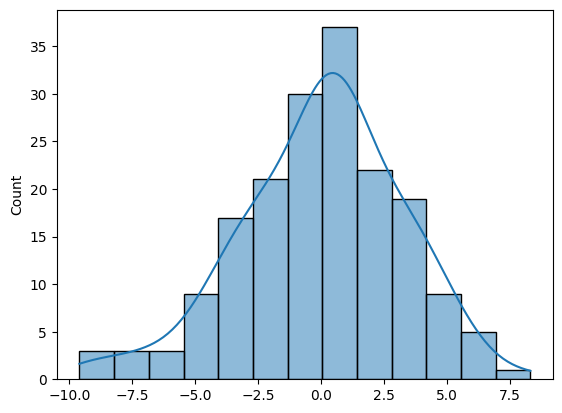

In [114]:
sns.histplot(res.resid, kde=True)

Normalita reziudí nám umožní použít řady údajů, které nám modul vypočítal. Dvě z nich jsou následující:

- `F-statistic` - testuje hypotézu, zda je model statisticky významný jako celek. To oceníme hlavně v případě modelu s více proměnnými. Pokud by byla p-hodnota více než 0.05, je model statisticky nevýznamný (tj. nic nám neříká).
- `P>|t|` - testuje hypotézu, zda je statisticky významný konkrétní koeficient (o něm už jsme mluvili). 

Použít ale můžeme základní měřítko kvality modelu, což je koeficient determinace `R-squared`. Ten nám říká, kolik procet rozptylu vysvětlované proměnné jsme naším modelem vysvětlili.

Více informací najdete například v [tomto článku](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a).

### Časové řady

Jako časovou řadu můžeme obecně označit taková data, která obsahují informace o datu a čase a tyto hodnoty v datech hrají významnou roli. Časovými řadami mohou být informace o teplotách, nám již známá měření kvality vzduchu, počty lidí ve veřejné dopravě, počtu nezaměstnaných osob atd.

Časové řady se obecně skládají z následujících komponent:

- trendu, což je výsledek nějakého dlouhodobého procesu (např. růst počtu obyvatel města, klimatické změny atd.),
- sezózní nebo cyklické složky, což jsou opakující se výkyvy krátkodobého (dny v týdnu, měsíce, roční období)
nebo dlouhodobého (ekonomické cykly),
- náhodná složky, která má nahodilý charakter (např. aktuální počasí, dopravní situace atd.).

Pro analýzu časových řad existuje mnoho různých přístupů.

- Pro "vyrovnání" (vyrovnání sezónních výkyvů) se používají klouzavé průměry.
- Dekompozice časové řady dokáže rozložit časovou řadu na její jednotlivé složky. Cílem je eliminovat náhodnou složku.
- Box-Jenkinsonova metoda je naopak zaměřená na zkoumání náhodné složky. Využívá tzv. ARMA (Autoregressive Moving Average) model či jeho varianty.

#### Klouzavé průměry

Jednou ze základních technik ke zpracování časových řad jsou klouzavé průměry (moving averages), což jsou průměry počítané z více hodnot, většinou bezprostředně následujících. Snahou klouzavých průměrů je vyrovnat časovou řadu, neboli eliminovat náhodnou či sezónní složku.

V souboru `AirPassengers.csv` jsou informace o počtu lidí přepravených letadly od začátku roku 1947.

<Axes: xlabel='Month'>

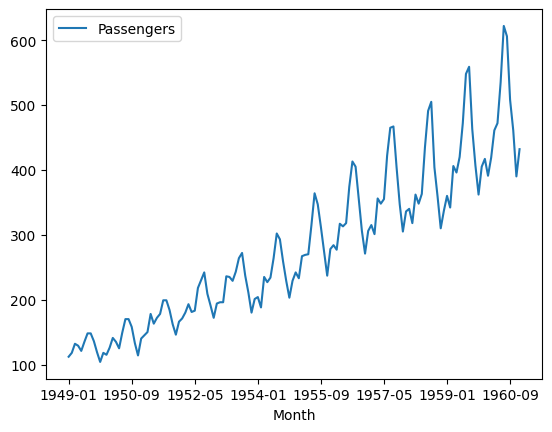

In [117]:
data = pd.read_csv("AirPassengers.csv")
data = data.rename({"#Passengers": "Passengers"}, axis=1)
data = data.set_index("Month")
data.plot()

Pro výpočet klouzavého průměru musíme určit délku jedné sezóny. Ta zpravidla vychází z logiky časové jednotky - u denních dat to bývá 7 dní, u měsíčních dat 12 měsíců. Zkusme tedy použít metodu `rolling()` modulu `pandas` k výpočtu klouzavých průměrů.

Tento typ klouzavých průměrů je někdy označován jako SMA (Simple Moving Average).

<Axes: xlabel='Month'>

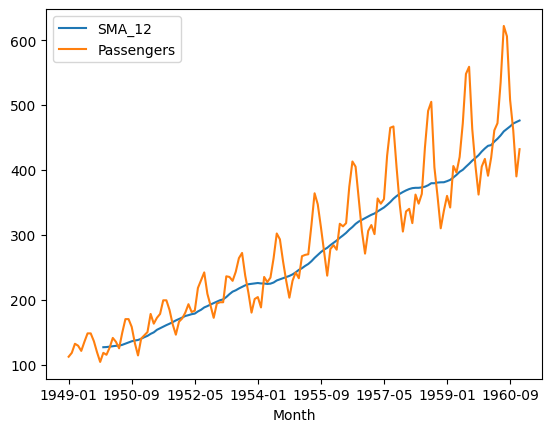

In [118]:
data["SMA_12"] = data["Passengers"].rolling(12).mean()
data[["SMA_12", "Passengers"]].plot()

Pokud bychom chtěli mít klouzavé průměry pro celou časovou řadu, použijeme parametr `min_periods`. Klouzavé průměry jsou pak dopočteny i v případě, že je k dispozici méně hodnot. Při nastavení `min_periods=1` je první hodnota klouzavého průměru rovná první skutečné hodnotě, protože z jiných hodnot ji dopočítat nelze.

<Axes: xlabel='Month'>

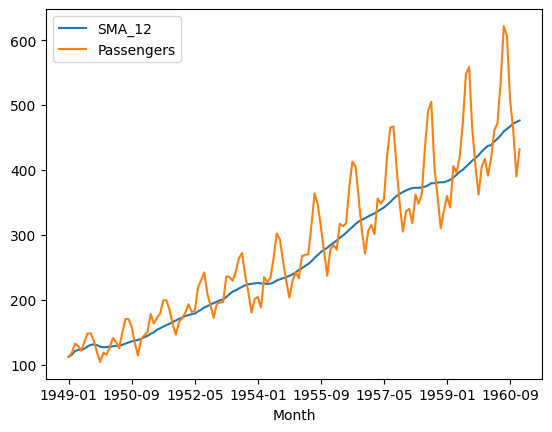

In [26]:
data["SMA_12"] = data["Passengers"].rolling(12, min_periods=1).mean()
data[["SMA_12", "Passengers"]].plot()

Nastavení délky sezónosti je důležité, protože při nesprávné hodnotě nemusí klouzavý průměr příliš dobře vyrovnat časovou řadu.

<Axes: xlabel='Month'>

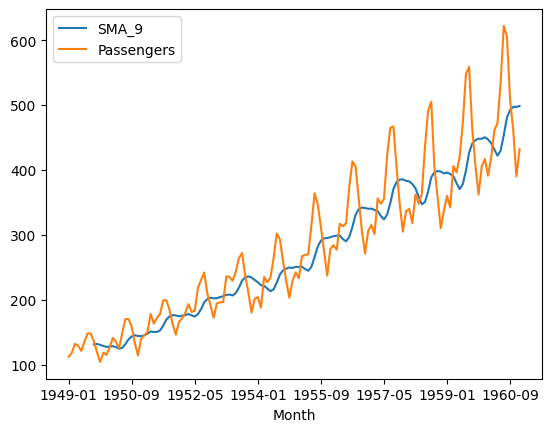

In [27]:
data["SMA_9"] = data["Passengers"].rolling(9).mean()
data[["SMA_9", "Passengers"]].plot()

Vedle jednoduchých klouzavých průměrů existují centrované klouzavé průměry, kde je hodnota průměru umístěna uprostřed periody. Při naší délce periody 12 je tak klouzavý průměr vypočítán z 6 předcházejících a 6 následujících hodnot.

Určitou nevýhodou centrovaných klouzavých průměrů je, že nikdy neznáme jich hodnotu pro nejnovější hodnoty časové řady (pokud neuvažujeme použití parametru `min_periods`).

<Axes: xlabel='Month'>

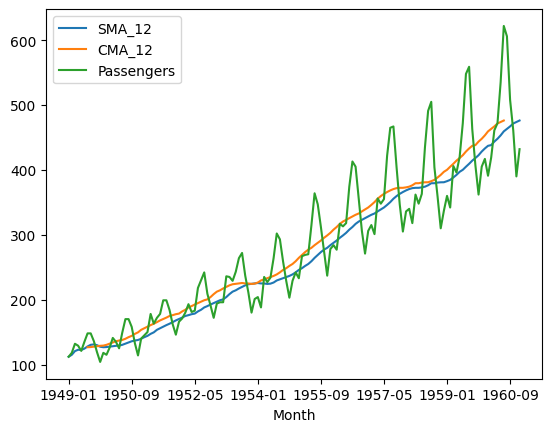

In [28]:
data["CMA_12"] = data["Passengers"].rolling(12, center=True).mean()
data[["SMA_12", "CMA_12", "Passengers"]].plot()

### Exponenciální vyrovnávání

Dalším populárním přístupem je exponenciální vyrovnávání (Exponential Moving Averages - EMA). Metoda funguje následujícím způsobem:

1. Jako první hodnotu vyrovnané řady použiju skutečně pozorovanou hodnotu.
1. Jako druhou a další metodu použiju vážený průměr minulé hodnoty vyrovnané řady a
pozorované hodnoty aktuální řady.

U exponenciálního vyrovnávání nastavujeme vyrovnávací konstantu $\alpha$.

Výpočet lze popsat následujícím vzorcem: $EMA_t = \alpha \cdot x_t + (1 - \alpha) EMA_{t-1} $, kde $x_t$ je pozorované hodnota v čase $t$. Ze vzorce plyne, že čím vyšší je hodnota $\alpha$, tím větší váhu má aktuální hodnota oproti vyrovnané řadě.

<Axes: xlabel='Month'>

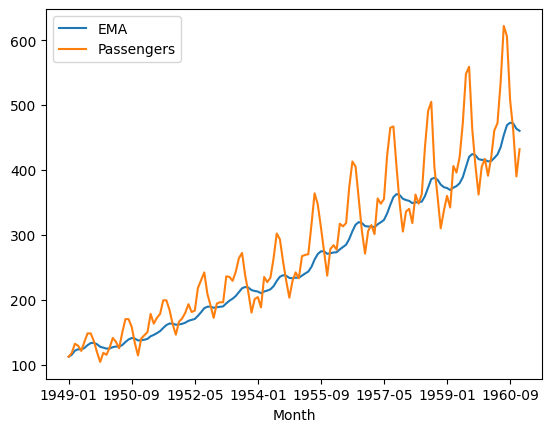

In [119]:
data["EMA"] = data["Passengers"].ewm(alpha=0.1).mean()
data[["EMA", "Passengers"]].plot()

#### Dekompozice časové řady

Tzv. **dekompozice** časové řady se snaží rozložit hodnoty na jednotlivé komponenty pomocí regrese.

Při dekompozici časové řady můžeme použít dva modely: aditivní a multiplikativní.

V aditivním modelu jsou všechny kopomenty časové řady sčítány

$$ y_t = t_t + s_t + \epsilon_t $$

a v multiplikativním modelu násobeny

$$ y_t = t_t \cdot s_t \cdot \epsilon_t \, . $$

K dekompozici můžeme použít modul `statsmodels`, konkrétně funkci `seasonal_decompose()`.

Nejprve zkusíme řadu modelovat pomocí aditivního modelu. Důležité je nastavit parametr `period`, který opět udává délku sezónního cyklu.

V případě aditivního modelu uvažujeme, že sezónní výkyvy jsou v absolutní hodnotě stejné.

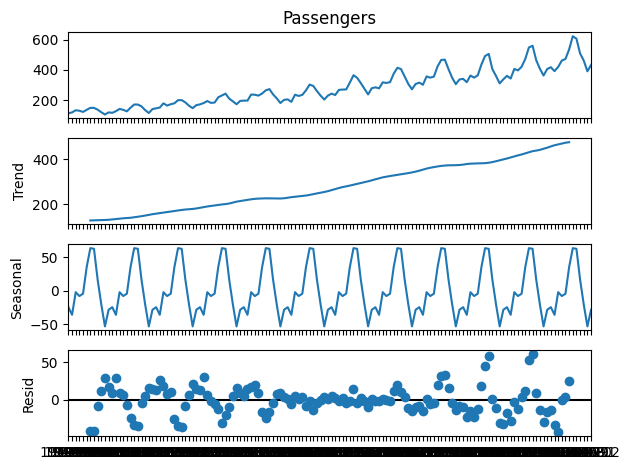

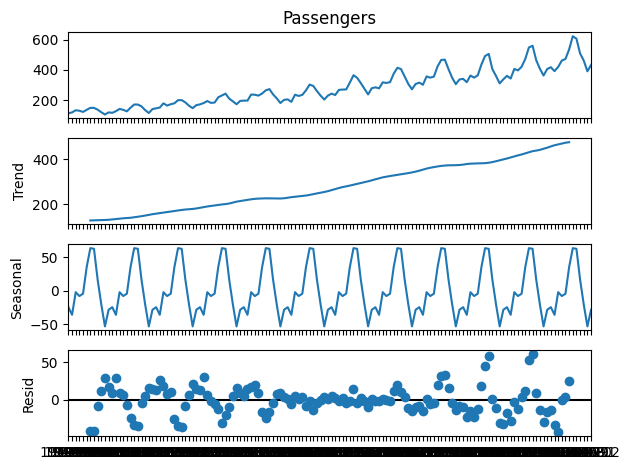

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(data['Passengers'], model='additive', period=12)
decompose.plot()

V případě multiplikativního trendu uvažujeme, že sezónní výkyvy jsou relativně stejné, v absolutní hodnotě rostou nebo klesají spolu s trendem.

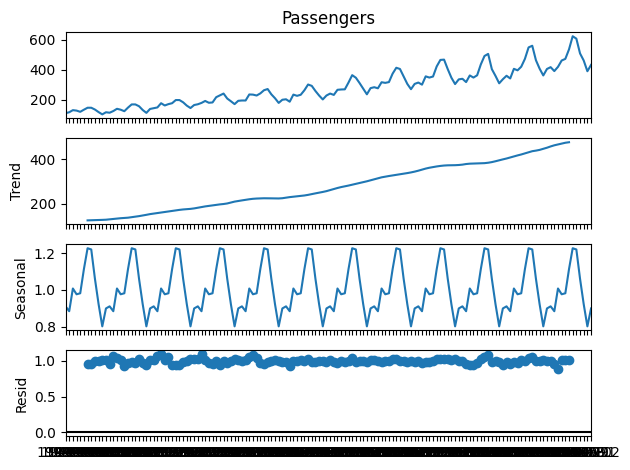

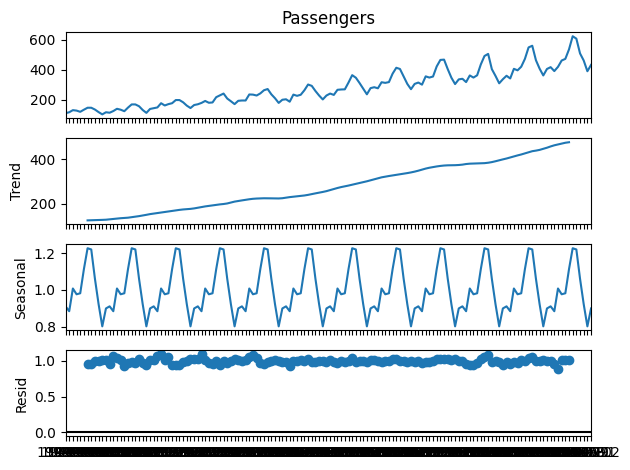

In [121]:
decompose = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
decompose.plot()

### Zdroje a další články

- [Statsmodel Regression Summary Will Never Intimidate You Again](https://www.blog.dailydoseofds.com/p/statsmodel-regression-summary-will)

# Cvičení

## Kvalita betonu

V souboru [Concrete_Data_Yeh.csv](Concrete_Data_Yeh.csv) najdeš informace o kvalitě betonu. Sloupce 1-7 udávají množství jednotlivých složek v kg, které byly přimíchány do krychlového metru betonu (např. cement, voda, kamenivo, písek atd.). Ve sloupci 8 je stáří betonu a ve sloupci 9 kompresní síla betonu v megapascalech. Vytvoř regresní model, který bude predikovat kompresní sílu betonu na základě všech množství jednotlivých složek a jeho stáří. Zhodnoť kvalitu modelu.

Která ze složek betonu ovlivňuje sílu betonu negativně (tj. má záporný regresní koeficient)?


Řešení příkladu je [zde](reseni.ipynb). Video s řešením příkladu je [zde](https://youtu.be/iGXlEpf0yb4).



## Bonus: Pojišťovna

V souboru [expenses.csv](expenses.csv) najdeš informace o platbách za pojištěnce jedné pojišťovny: věk, pohlaví, BMI (index počítaný jako hmotnost dělená výškou), počet dětí, kuřák/nekuřák, region a platby za pojištěnce. 

Vytvoř regresní model, který odhadne platby za pojištěnce na základě jeho věku a indexu BMI.

V regresi se často využívá metoda označovaná jako One Hot Encoding, která slouží ke zpracování nečíselných (kategoriálních) dat. Metodu aplikuješ tak, že vytvoříme sloupec pro každou hodnotu, které kategoriálních hodnota může nabýt. Pro každý řádek je pak hodnota příslušného sloupce 1 a ostatních sloupců 0. Vytvoř tedy sloupec `smoker_number` (takovému sloupci se říká *dummy* proměnná), který bude obsahovat hodnotu 1, pokud je ve sloupci `smoker` hodnota `yes`, a v opačném případě 0. Můžeš využít metodu `apply()` nebo funkci `numpy.where()`. Dále přidej nově vytvořený sloupec do regresního modelu. O kolik se zvýšil koeficient determinace?

Takový postup vytváření je poměrně pracný, hlavně v případě, že proměnná nabývá více různých hodnot. `pandas` k tomu nabízí funkci `get_dummies()`. Vyzkoušej si funkci použitím příkazu níže.


In [154]:
import pandas
import statsmodels.formula.api as smf
data = pd.read_csv("expenses.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [155]:
formula="charges ~ age + bmi"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           7.39e-37
Time:                        21:40:56   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6424.8046   1744.091     -3.684      0.000   -9846.262   -3003.347
age          241.9308     22.298     10.850      0.000     198.187     285.674
bmi          332.9651     51.374      6.481      0.000     232.182     433.748
==============================================================================
Omnibus:                      321.874   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.574
Skew:                           1.511   Prob(JB):                    2.11e-129
Kurtosis:                       4.223   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
def smoker(row):
    if row["smoker"] == "yes":
        return 1
    else:
        return 0

In [158]:
data["smoker_number"] = data.apply(smoker, axis=1)
data["sex"] = data.apply("sex", axis=1)

formula = "charges ~  age + bmi + smoker_number"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:41:29   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
age             259.5475     11.934     21.748      0.000     236.136     282.959
bmi             322.6151     27.487     11.737      0.000     268.692     376.538
smoker_number  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
smoker = pandas.get_dummies(data["smoker"])
smoker


,no,yes
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1333,True,False
1334,True,False
1335,True,False
1336,True,False


In [160]:
data = pandas.merge(data, smoker, left_index=True, right_index=True)
data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_number,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,False,True
1,18,male,33.770,1,no,southeast,1725.55230,0,True,False
2,28,male,33.000,3,no,southeast,4449.46200,0,True,False
3,33,male,22.705,0,no,northwest,21984.47061,0,True,False
4,32,male,28.880,0,no,northwest,3866.85520,0,True,False


In [161]:
formula = "charges ~  age + bmi + yes"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:43:12   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
yes[T.True]  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
age           259.5475     11.934     21.748      0.000     236.136     282.959
bmi           322.6151     27.487     11.737      0.000     268.692     376.538
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""




```py
smoker = pandas.get_dummies(data["smoker"])
smoker
```

Dále připoj data do původní tabulky. Připojení je nutné provést s využitím indexů, protože tabulky nemají společný sloupec. Proto využij funkci `merge()` s parametry `left_index=True` a `right_index=True`.

```py
data = pandas.merge(data, smoker, left_index=True, right_index=True)
data
```

Nyní využij tento sloupec ve svém regresním modelu. Stačí využít jeden sloupec, například `yes`. Oba sloupce totiž poskytují stejnou informaci, pouze jako obrácenou hodnotu.

Řešení bonusu je [zde](reseni.ipynb). Video s řešením příkladu je [zde](https://youtu.be/oJPz7Ui4ZkE).

V tomto modelu OLS (Ordinary Least Squares) bylo k prediktorům věk a BMI přidáno binární kódování (One Hot Encoding) pro proměnnou "kuřák" (yes). Výsledky regrese ukazují výrazné zlepšení v predikční schopnosti modelu v porovnání s předchozím modelem, který zahrnoval pouze věk a BMI.

 Výsledky modelu
 R-squared (R²) = 0.747 a Adjusted R-squared = 0.747: Tento model vysvětluje 74.7% variability v platbách za pojištěnce, což je výrazné zlepšení oproti předchozímu modelu. Tato hodnota naznačuje, že model je velmi efektivní v popisu vztahů mezi závislou proměnnou a vysvětlujícími proměnnými.
F-statistika = 1316 s p-hodnota = 0.00: Extrémně nízká p-hodnota ukazuje, že model jako celek je statisticky významný a poskytuje silnou evidenci, že alespoň jeden z prediktorů má významný vliv na výši plateb za pojištění.

Koeficienty:
Intercept (konstanta): -11680, indikuje základní platby za pojištěnce pro nekuřáky s danými hodnotami BMI a věku rovnými nule.
- yes[T.True] (kuřák): Koeficient 23820 znamená, že kuřáci platí průměrně o 23820 dolarů více než nekuřáci, což je velmi výrazný rozdíl, p-hodnota < 0.001.
- Věk (age): Každý rok navíc zvyšuje platby za pojištění o přibližně 259.55 dolarů. - BMI (bmi): Každý bod BMI zvyšuje platby o 322.62 dolarů.

Diagnostika reziduí: Omnibus test a Jarque-Bera (JB) test: Oba testy jsou statisticky významné a naznačují, že rezidua nejsou normálně distribuovaná.
Durbin-Watson: Hodnota 2.077 naznačuje, že autokorelace mezi rezidui je minimální.

Zhodnocení modelu Přidání proměnné "kuřák" významně zlepšilo prediktivní schopnosti modelu, což ukazuje, že fakt, zda je osoba kuřákem, má významný dopad na výši plateb za zdravotní pojištění. Vysoké R-squared hodnoty a výrazné koeficienty naznačují, že model je velmi účinný v odhadu plateb. Avšak nízká normalita reziduí by mohla být znepokojivá pro některé typy dalších analýz a může znamenat, že modelování rozdělení plateb může vyžadovat pokročilejší metody, jako je transformace proměnných nebo použití jiných typů regresních modelů.

In [141]:
import pandas
import statsmodels.formula.api as smf
data = pd.read_csv("Concrete_Data_Yeh.csv")
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [138]:
formula="csMPa ~ cement + flyash +  slag + water + superplasticizer + coarseaggregate + fineaggregate + age"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          6.29e-206
Time:                        20:25:16   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement               0.1198      0.008     14.113      0.000       0.103       0.136
flyash               0.0879      0.013      6.988      0.000       0.063       0.113
slag                 0.1039      0.010     10.247      0.000       0.084       0.124
water               -0.1499      0.040     -3.731      0.000      -0.229      -0.071
superplasticizer     0.2922      0.093      3.128      0.002       0.109       0.476
coarseaggregate      0.0181      0.009      1.926      0.054      -0.000       0.037
fineaggregate        0.0202      0.011      1.887      0.059      -0.001       0.041
age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
data.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000
